# Support Vector Regression

La idea de la margen débil con máquinas vectores de soporte también se puede aplicar para problemas de regresión. La clase correspondiente en **scikit-learn** es **SVR**, que encuentra un "tubo" que incluya la mayor cantidad de puntos.

## 1. Creación de datasets sintéticos aleatorios

Cargamos las librerías

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action=‘ignore’,category=DeprecationWarning)
#warnings.filterwarnings(action=‘ignore’,category=FutureWarning)

Vamos a crear dos datasets von un mismo proceso generador, utilizando una base sinusoidal, a la que le vamos a agregar ruido para volverla más interesante.

In [2]:
random.seed(123)
num_puntos_train = 1000
num_puntos = 200
ruido_uniforme_agregado = 1

In [3]:
X_train, y_train = [],[]
for i in range(num_puntos):
    a = i/10+random.uniform(-ruido_uniforme_agregado,ruido_uniforme_agregado)
    yy = math.sin(a)+3+random.uniform(-ruido_uniforme_agregado,ruido_uniforme_agregado)
    X_train.append([a])
    y_train.append([yy])  
X_train = np.array(X_train)
y_train = np.array(y_train)

In [4]:
X_train.shape

(200, 1)

In [5]:
y_train.shape

(200, 1)

In [6]:
random.seed(124)
X_test, y_test = [],[]
for i in range(num_puntos):
    a = i/10+random.uniform(-ruido_uniforme_agregado,ruido_uniforme_agregado)
    yy = math.sin(a)+3+random.uniform(-ruido_uniforme_agregado,ruido_uniforme_agregado)
    X_test.append([a])
    y_test.append([yy])  
X_test = np.array(X_test)
y_test = np.array(y_test)

Ploteamos los datos 

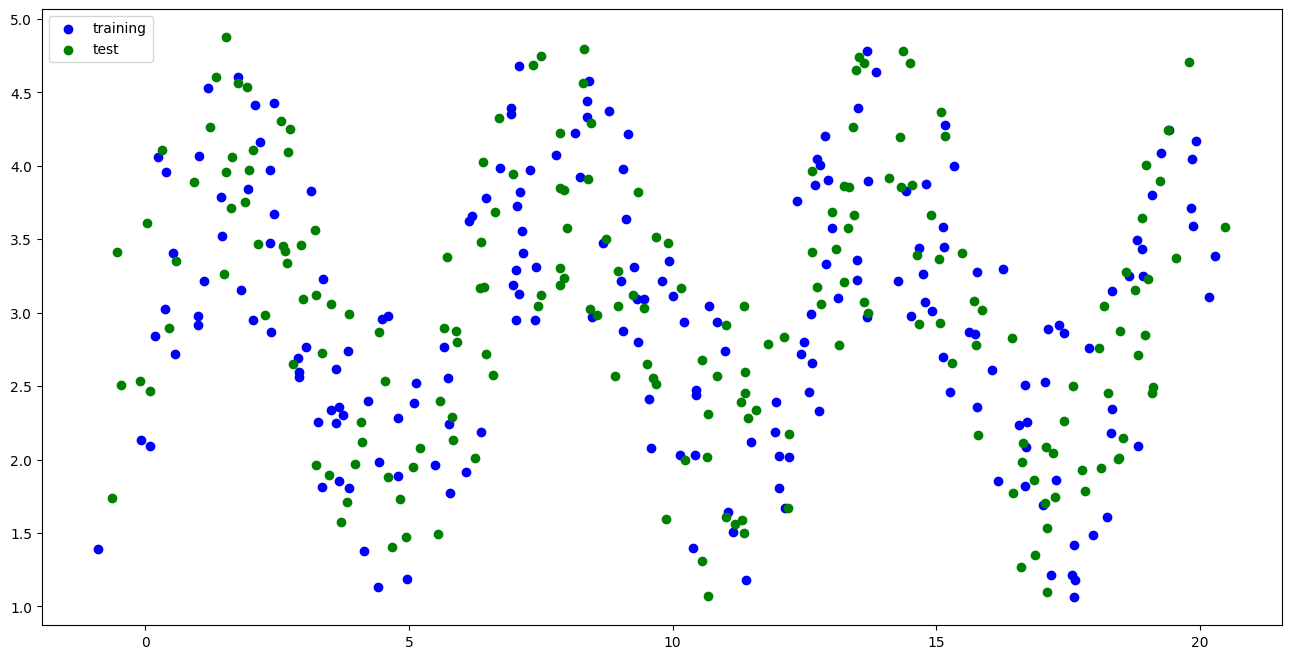

In [7]:
plt.figure(figsize=(16,8))
plt.scatter(X_train, y_train, c="b", label="training")
plt.scatter(X_test, y_test, c="g", label="test")
plt.legend()
_=plt.show()

## 2. Entrenamiento de modelo SVM de regresión

Vamos a utilizar la clase **SVR**, del paquete scikit-learn.
Para la instanciación, hay que especificar los mismos parámetros que con un clasificador, particularmente:

- *C*: valor de la penalidad de una instancia por violación de las márgenes (1 por defecto); controla la regularización. A menor valor de C, mayor amplitud de la margen del "tubo" de regresión
- *kernel*: el tipo de kernel a utilizar ('rbf' por defecto); otros valores aceptados son: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’.
- *degree*: grado del polinomio en el caso del kernel 'poly' (3 por defecto); se ignora para otros kernels.
- *gamma*: determina la dispersión alrededor de los vectores de soporte ('auto' por defecto); solo se considera para los kernels ‘rbf’, ‘poly’ y ‘sigmoid’. Por defecto, *gamma* es igual a 1/m, donde m es el número de dimensiones. A mayor *gamma*, más complejo será el espacio de representación de los datos.

In [8]:
C = 0.1
modelo = SVR(C=C, kernel='rbf')
modelo.fit(X_train, y_train)

SVR(C=0.1)

La predicción se hace a través del método **predict**, que recibe un array con los valores de las variables predictivas.

In [9]:
y_pred = modelo.predict(X_test)

Vamos a ver como quedan los resultados predichos por el modelo de regresión, comparándolos a los datos reales.

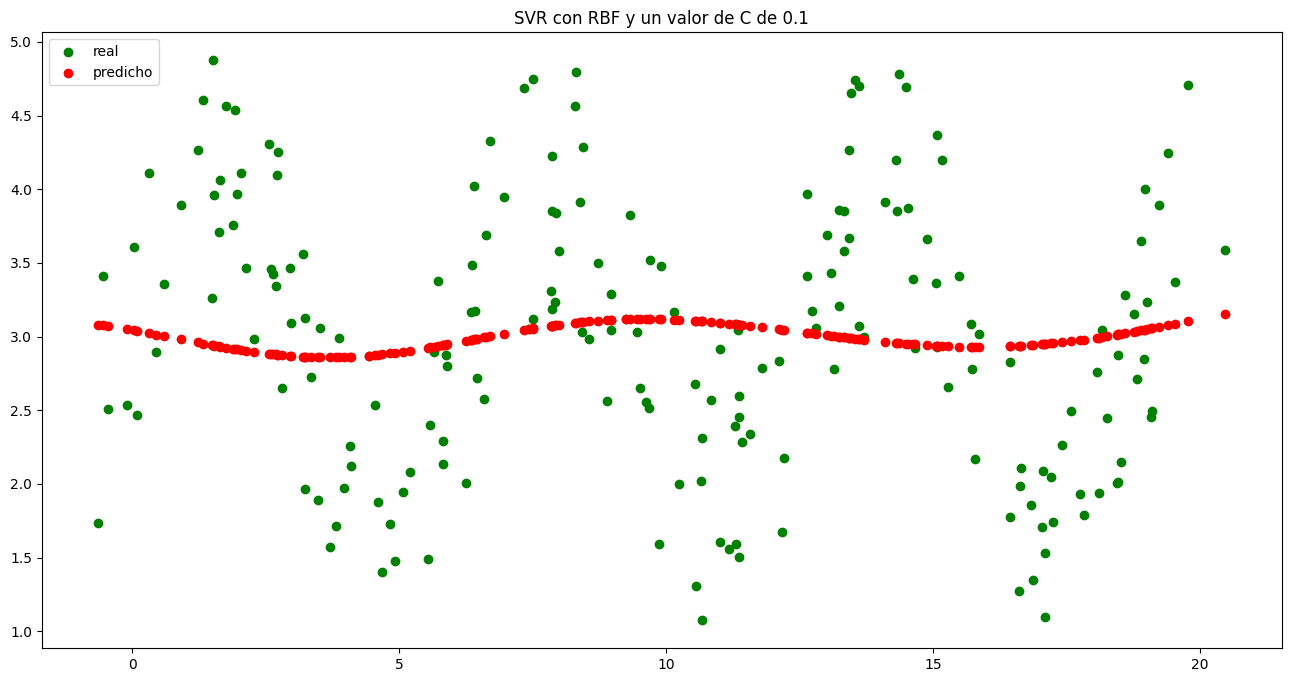

In [10]:
plt.figure(figsize=(16,8))
plt.scatter(X_test, y_test, c="g", label="real")
plt.scatter(X_test, y_pred, c="r", label="predicho")
plt.title("SVR con RBF y un valor de C de {}".format(C) )
plt.legend()
_=plt.show()

Evaluemos la calidad del modelo. Vamos a utilizar el método **score**, que nos retorna el R2 de las predicciones.

In [11]:
score=modelo.score(X_train, y_train)
print("R2=", score)

mse =mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("RMSE:", rmse)

R2= 0.026008751690487553
RMSE: 0.9119778984115942


Intentemos con un mayor valor de *C*, para entender mejor la influencia del parámetro.

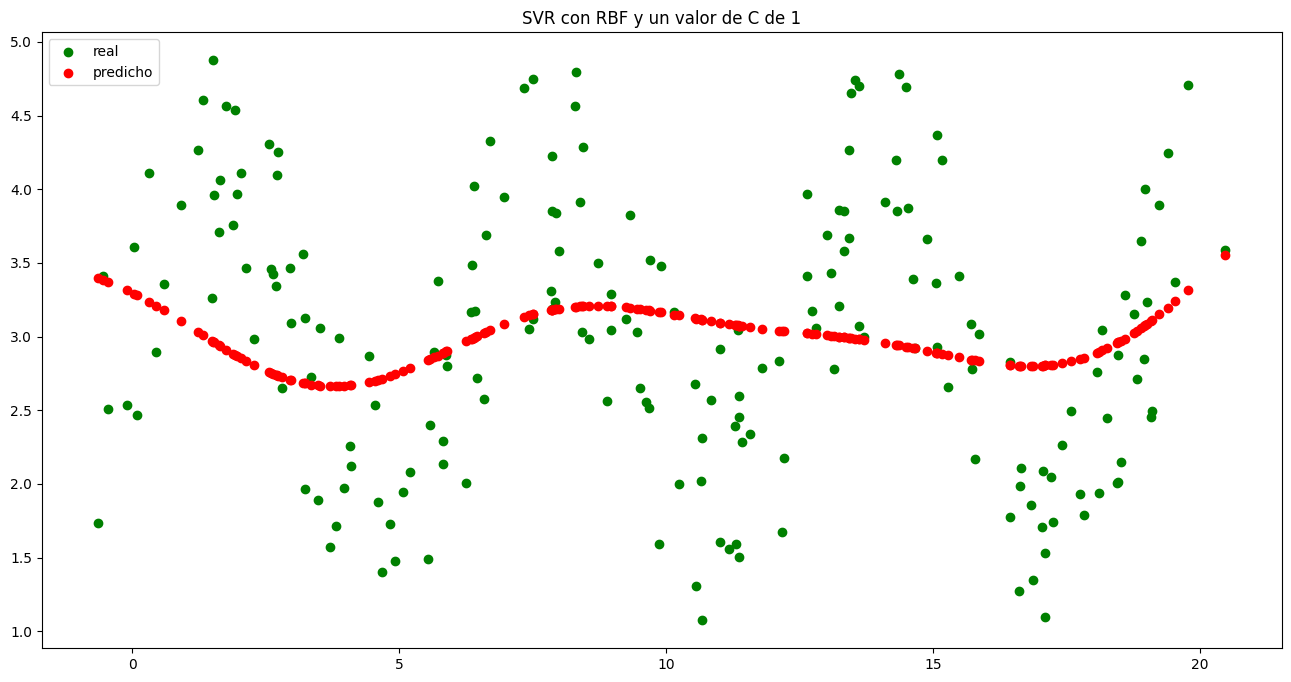

R2= 0.097576944666797
RMSE: 0.8863715949749388


In [12]:
C=1
modelo = SVR(C=C, kernel='rbf')
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

plt.figure(figsize=(16,8))
plt.scatter(X_test, y_test, c="g", label="real")
plt.scatter(X_test, y_pred, c="r", label="predicho")
plt.legend()
plt.title("SVR con RBF y un valor de C de {}".format(C) )
_=plt.show()

score=modelo.score(X_train, y_train)
print("R2=", score)
mse =mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("RMSE:", rmse)

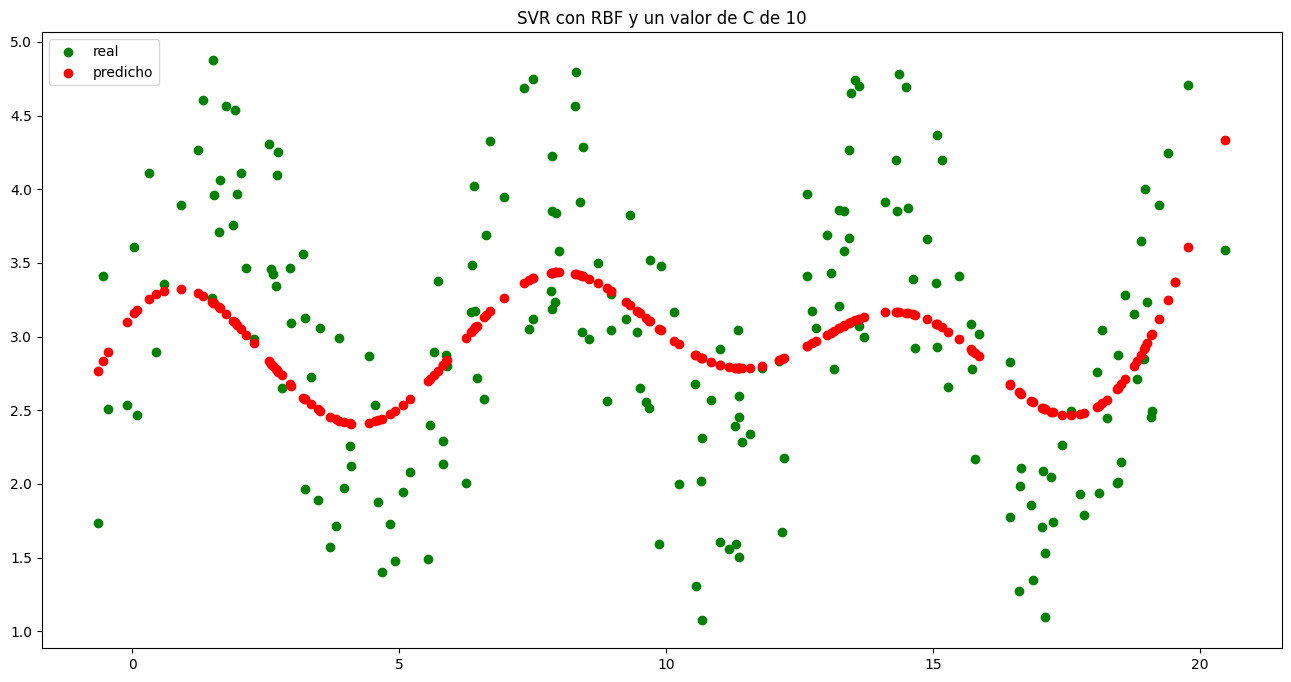

R2= 0.33694137189118956
RMSE: 0.7565962244293657


In [13]:
C=10
modelo = SVR(C=C, kernel='rbf')
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

plt.figure(figsize=(16,8))
plt.scatter(X_test, y_test, c="g", label="real")
plt.scatter(X_test, y_pred, c="r", label="predicho")
plt.legend()
plt.title("SVR con RBF y un valor de C de {}".format(C) )
_=plt.show()

score=modelo.score(X_train, y_train)
print("R2=", score)
mse =mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("RMSE:", rmse)

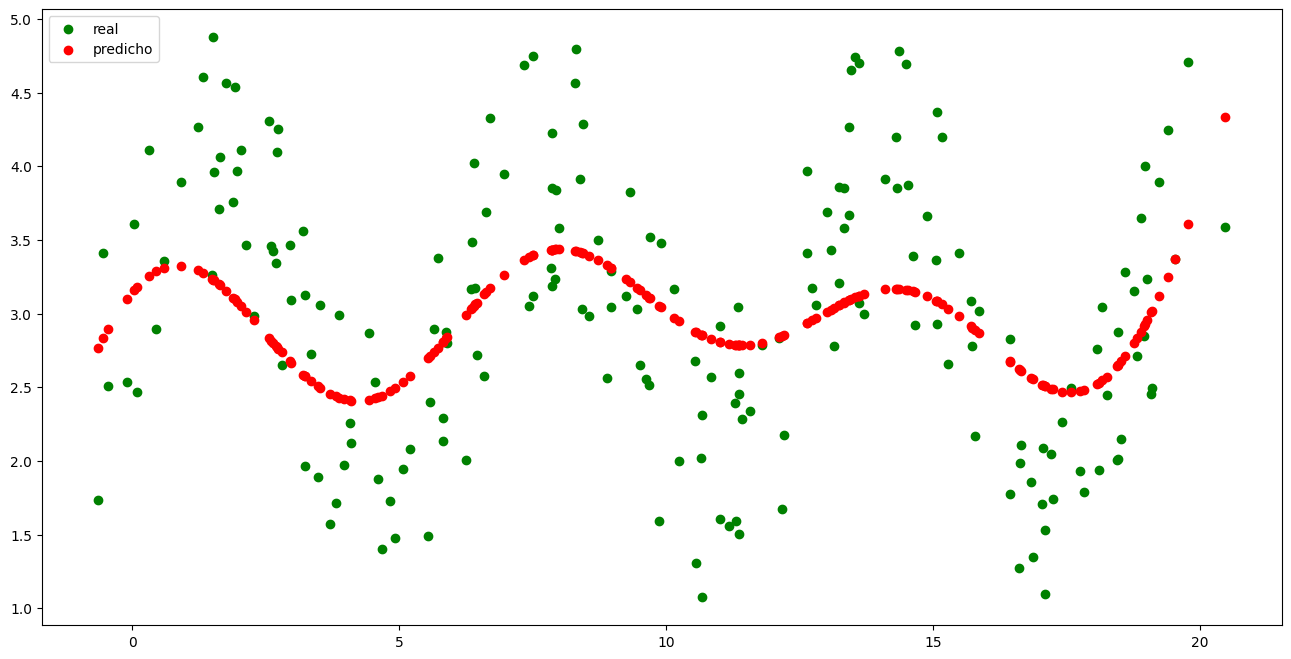

R2= 0.33694137189118956
RMSE: 0.7565962244293657


In [14]:
modelo = SVR(C=10, kernel='rbf')
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

plt.figure(figsize=(16,8))
plt.scatter(X_test, y_test, c="g", label="real")
plt.scatter(X_test, y_pred, c="r", label="predicho")
plt.legend()
_=plt.show()

score=modelo.score(X_train, y_train)
print("R2=", score)
mse =mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("RMSE:", rmse)

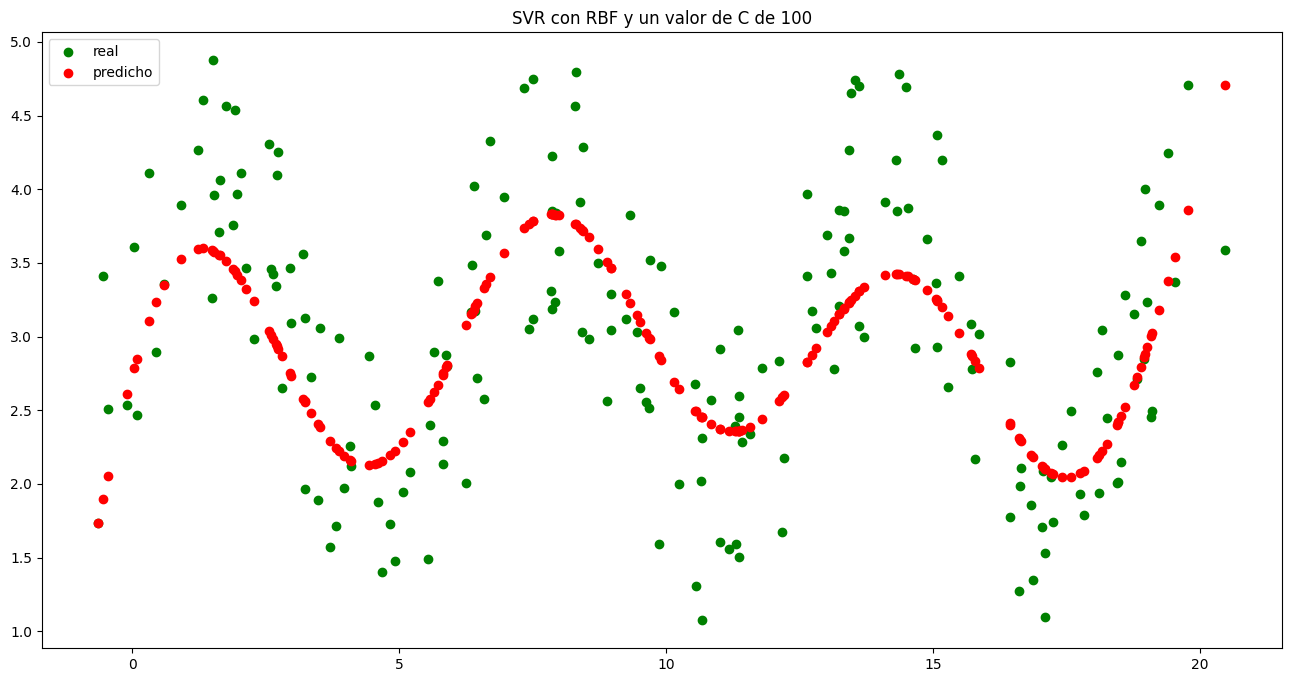

In [15]:
C=100
modelo = SVR(C=C, kernel='rbf')
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

plt.figure(figsize=(16,8))
plt.scatter(X_test, y_test, c="g", label="real")
plt.scatter(X_test, y_pred, c="r", label="predicho")
plt.legend()
plt.title("SVR con RBF y un valor de C de {}".format(C) )
_=plt.show()

### Selección de modelo:

In [16]:
metrica = 'neg_mean_squared_error'

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [18]:
steps = [("SVR_linear", SVR(kernel="linear"))]
pipeline = Pipeline(steps)
parametros = {'SVR_linear__C':[0.01,0.05,0.1,0.5,1,5,10]}
grid1 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=metrica)
grid1.fit(X_train, y_train)
print("score = %3.4f" %(grid1.score(X_test,y_test)))
print(grid1.best_params_)

score = -0.8320
{'SVR_linear__C': 0.05}


In [19]:
steps = [("SVR_rbf", SVR(kernel="rbf"))]
pipeline = Pipeline(steps)
parametros = {'SVR_rbf__C':[0.01,0.05,0.1,0.5,1,5,10], 'SVR_rbf__gamma':[0.01,0.05,0.09,1,1.05,2,5]} 
grid2 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=metrica)
grid2.fit(X_train, y_train)
print("score = %3.4f" %(grid2.score(X_test,y_test)))
print(grid2.best_params_)

score = -0.4000
{'SVR_rbf__C': 1, 'SVR_rbf__gamma': 1}


In [20]:
steps = [("SVR_sigmoid", SVR(kernel="sigmoid"))]
pipeline = Pipeline(steps)
parametros = {'SVR_sigmoid__C':[0.01,0.05,0.1,0.5,1,5,10], 'SVR_sigmoid__gamma':[0.05,0.01, 1, 5]}
grid3 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=metrica)
grid3.fit(X_train, y_train)
print("score = %3.4f" %(grid3.score(X_test,y_test)))
print(grid3.best_params_)

score = -2.0479
{'SVR_sigmoid__C': 0.1, 'SVR_sigmoid__gamma': 0.05}


Encontramos que el mejor modelo es con un kernel **rbf**, con un valor de gamma de 1. Ya lo habíamos analizado anteriormente.